# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import os
import csv
import random
import numpy as np
import requests
from pprint import pprint
from config import api_key

## Generate Cities List

In [2]:
### Generate a random Lat Long table to generate a cities list:  
latlist = []
longlist = []
for i in range(0,1500):
    latlist.append(float(random.randrange(-90, 90))*1.00249)
    longlist.append(float(random.randrange(-180, 180))*1.00249)

dict_with_lists = {"Latitude": latlist,
                   "Longitude": longlist}
RandomLatLong_df = pd.DataFrame(dict_with_lists)

# Make sure not lat long values above +/- 90 and +/- 180 respectively  
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]>=-180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]<=180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]>=-90)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]<=90)]

# View lat long dataframe
RandomLatLong_df


Latitude  Longitude
0     23.05727   15.03735
1     -4.00996   57.14193
2     55.13695  -55.13695
3     -6.01494  163.40587
4    -26.06474  176.43824
...        ...        ...
1494 -42.10458   55.13695
1495 -26.06474 -158.39342
1497 -84.20916   39.09711
1498  86.21414   29.07221
1499  -1.00249 -101.25149

[1488 rows x 2 columns]

In [33]:
### Generate a random cities from Lat Long table make sure we have up to 500. Delete any duplicates: 
# Make lists needed
cityList = []
countryList = []

# Create a loop to find a city for each lat long pair
for index, row in RandomLatLong_df.iterrows():
    print(f"Searching for nearest city to lat long {row['Latitude'], row['Longitude']}...")
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cityName = city.city_name
    cityCountry = city.country_code
    RandomLatLong_df.loc[index,"City_Name"] = cityName
    RandomLatLong_df.loc[index,"Country"] = cityCountry
    cityList.append(cityName)
    countryList.append(cityCountry)

### Trying to identify and remove any duplicate cities 
CleanLatLong_df = RandomLatLong_df.drop_duplicates(subset = ['City_Name'])
print(RandomLatLong_df["City_Name"].value_counts())
          
# Update my cities and country list and lat long lists
citySeries = CleanLatLong_df['City_Name']
countrySeries = CleanLatLong_df['Country']
LatSeries = CleanLatLong_df['Latitude']
LongSeries = CleanLatLong_df['Longitude']
cityList = citySeries.values.tolist()
countryList = countrySeries.values.tolist()
LatList = LatSeries.values.tolist()
LongList = LongSeries.values.tolist()

citySeries

Searching for nearest city to lat long (23.057270000000003, 15.037350000000002)...
Searching for nearest city to lat long (-4.00996, 57.14193000000001)...
Searching for nearest city to lat long (55.136950000000006, -55.136950000000006)...
Searching for nearest city to lat long (-6.014940000000001, 163.40587000000002)...
Searching for nearest city to lat long (-26.064740000000004, 176.43824)...
Searching for nearest city to lat long (63.156870000000005, 100.24900000000001)...
Searching for nearest city to lat long (-77.19173, 36.08964)...
Searching for nearest city to lat long (-66.16434000000001, 93.23157)...
Searching for nearest city to lat long (-47.11703000000001, -162.40338000000003)...
Searching for nearest city to lat long (-55.136950000000006, -112.27888000000002)...
Searching for nearest city to lat long (82.20418000000001, 130.3237)...
Searching for nearest city to lat long (-85.21165, -168.41832000000002)...
Searching for nearest city to lat long (-39.09711, -94.234060000000

Searching for nearest city to lat long (-4.00996, 112.27888000000002)...
Searching for nearest city to lat long (25.062250000000002, 109.27141000000002)...
Searching for nearest city to lat long (3.0074700000000005, -67.16683)...
Searching for nearest city to lat long (29.072210000000002, 172.42828000000003)...
Searching for nearest city to lat long (6.014940000000001, -114.28386000000002)...
Searching for nearest city to lat long (-86.21414000000001, 12.029880000000002)...
Searching for nearest city to lat long (10.0249, 38.094620000000006)...
Searching for nearest city to lat long (57.14193000000001, -62.15438)...
Searching for nearest city to lat long (55.136950000000006, 156.38844)...
Searching for nearest city to lat long (-65.16185, -166.41334)...
Searching for nearest city to lat long (-27.067230000000002, -46.114540000000005)...
Searching for nearest city to lat long (-73.18177000000001, -176.43824)...
Searching for nearest city to lat long (-21.052290000000003, 73.181770000000

Searching for nearest city to lat long (34.08466000000001, 64.15936)...
Searching for nearest city to lat long (-20.0498, -87.21663000000001)...
Searching for nearest city to lat long (-8.01992, 136.33864000000003)...
Searching for nearest city to lat long (-70.1743, -18.04482)...
Searching for nearest city to lat long (-17.042330000000003, -94.23406000000001)...
Searching for nearest city to lat long (-32.07968, -87.21663000000001)...
Searching for nearest city to lat long (42.104580000000006, 5.01245)...
Searching for nearest city to lat long (-35.08715, -64.15936)...
Searching for nearest city to lat long (69.17181000000001, -99.24651000000001)...
Searching for nearest city to lat long (-38.094620000000006, 154.38346)...
Searching for nearest city to lat long (-68.16932000000001, -25.062250000000002)...
Searching for nearest city to lat long (-80.1992, -115.28635000000001)...
Searching for nearest city to lat long (70.1743, -91.22659000000002)...
Searching for nearest city to lat lo

Searching for nearest city to lat long (-84.20916000000001, -29.072210000000002)...
Searching for nearest city to lat long (83.20667, -102.25398000000001)...
Searching for nearest city to lat long (-48.11952000000001, -126.31374000000001)...
Searching for nearest city to lat long (-60.14940000000001, -123.30627000000001)...
Searching for nearest city to lat long (60.14940000000001, -157.39093000000003)...
Searching for nearest city to lat long (-69.17181000000001, -12.029880000000002)...
Searching for nearest city to lat long (-73.18177000000001, 85.21165)...
Searching for nearest city to lat long (54.134460000000004, 4.00996)...
Searching for nearest city to lat long (-27.067230000000002, -148.36852000000002)...
Searching for nearest city to lat long (-87.21663000000001, -173.43077000000002)...
Searching for nearest city to lat long (66.16434000000001, -140.3486)...
Searching for nearest city to lat long (-26.064740000000004, -57.14193000000001)...
Searching for nearest city to lat lo

Searching for nearest city to lat long (38.094620000000006, -50.124500000000005)...
Searching for nearest city to lat long (-22.05478, 60.14940000000001)...
Searching for nearest city to lat long (-36.08964, -43.10707000000001)...
Searching for nearest city to lat long (59.146910000000005, 17.042330000000003)...
Searching for nearest city to lat long (-78.19422, -32.07968)...
Searching for nearest city to lat long (37.092130000000004, 162.40338000000003)...
Searching for nearest city to lat long (19.047310000000003, 111.27639)...
Searching for nearest city to lat long (26.064740000000004, 144.35856)...
Searching for nearest city to lat long (-57.14193000000001, 162.40338000000003)...
Searching for nearest city to lat long (74.18426000000001, 178.44322000000003)...
Searching for nearest city to lat long (63.156870000000005, 104.25896000000002)...
Searching for nearest city to lat long (25.062250000000002, 92.22908000000001)...
Searching for nearest city to lat long (54.134460000000004, 

Searching for nearest city to lat long (80.1992, 34.08466000000001)...
Searching for nearest city to lat long (-18.04482, 171.42579)...
Searching for nearest city to lat long (19.047310000000003, 41.102090000000004)...
Searching for nearest city to lat long (-23.057270000000003, 39.09711)...
Searching for nearest city to lat long (-79.19671000000001, -49.12201)...
Searching for nearest city to lat long (59.146910000000005, -89.22161000000001)...
Searching for nearest city to lat long (-14.034860000000002, 142.35358000000002)...
Searching for nearest city to lat long (-28.069720000000004, 124.30876)...
Searching for nearest city to lat long (84.20916000000001, -87.21663000000001)...
Searching for nearest city to lat long (-51.126990000000006, 16.03984)...
Searching for nearest city to lat long (14.034860000000002, 176.43824)...
Searching for nearest city to lat long (-81.20169000000001, -67.16683)...
Searching for nearest city to lat long (-54.134460000000004, 135.33615)...
Searching fo

Searching for nearest city to lat long (47.11703000000001, -35.08715)...
Searching for nearest city to lat long (-82.20418000000001, -53.13197)...
Searching for nearest city to lat long (70.1743, -30.074700000000004)...
Searching for nearest city to lat long (-24.059760000000004, -60.14940000000001)...
Searching for nearest city to lat long (-5.01245, -92.22908000000001)...
Searching for nearest city to lat long (-7.017430000000001, -27.067230000000002)...
Searching for nearest city to lat long (-51.126990000000006, -143.35607000000002)...
Searching for nearest city to lat long (57.14193000000001, -160.3984)...
Searching for nearest city to lat long (-84.20916000000001, -159.39591000000001)...
Searching for nearest city to lat long (-10.0249, -46.114540000000005)...
Searching for nearest city to lat long (85.21165, -91.22659000000002)...
Searching for nearest city to lat long (55.136950000000006, -78.19422)...
Searching for nearest city to lat long (-22.05478, -32.07968)...
Searching f

Searching for nearest city to lat long (-37.092130000000004, -154.38346)...
Searching for nearest city to lat long (51.126990000000006, -91.22659000000002)...
Searching for nearest city to lat long (-50.124500000000005, -28.069720000000004)...
Searching for nearest city to lat long (47.11703000000001, -14.034860000000002)...
Searching for nearest city to lat long (24.059760000000004, -29.072210000000002)...
Searching for nearest city to lat long (-64.15936, -147.36603000000002)...
Searching for nearest city to lat long (6.014940000000001, 95.23655000000001)...
Searching for nearest city to lat long (40.0996, -146.36354000000003)...
Searching for nearest city to lat long (-18.04482, 144.35856)...
Searching for nearest city to lat long (-53.13197, -55.136950000000006)...
Searching for nearest city to lat long (76.18924000000001, -54.134460000000004)...
Searching for nearest city to lat long (-40.0996, -156.38844)...
Searching for nearest city to lat long (10.0249, -153.38097000000002)...

Searching for nearest city to lat long (-11.02739, 8.01992)...
Searching for nearest city to lat long (47.11703000000001, -60.14940000000001)...
Searching for nearest city to lat long (22.05478, -159.39591000000001)...
Searching for nearest city to lat long (77.19173, 98.24402)...
Searching for nearest city to lat long (-88.21912, -50.124500000000005)...
Searching for nearest city to lat long (55.136950000000006, 64.15936)...
Searching for nearest city to lat long (-83.20667, 88.21912)...
Searching for nearest city to lat long (66.16434000000001, -137.34113000000002)...
Searching for nearest city to lat long (-84.20916000000001, -72.17928)...
Searching for nearest city to lat long (7.017430000000001, 73.18177000000001)...
Searching for nearest city to lat long (78.19422, -152.37848000000002)...
Searching for nearest city to lat long (13.032370000000002, -117.29133000000002)...
Searching for nearest city to lat long (60.14940000000001, -18.04482)...
Searching for nearest city to lat lon

Searching for nearest city to lat long (80.1992, 151.37599)...
Searching for nearest city to lat long (-86.21414000000001, -13.032370000000002)...
Searching for nearest city to lat long (82.20418000000001, -91.22659000000002)...
Searching for nearest city to lat long (49.12201, -176.43824)...
Searching for nearest city to lat long (40.0996, -94.23406000000001)...
Searching for nearest city to lat long (-43.10707000000001, -131.32619000000003)...
Searching for nearest city to lat long (-78.19422, -17.042330000000003)...
Searching for nearest city to lat long (-26.064740000000004, -131.32619000000003)...
Searching for nearest city to lat long (-34.08466000000001, 65.16185)...
Searching for nearest city to lat long (-33.082170000000005, -99.24651000000001)...
Searching for nearest city to lat long (35.08715, -19.047310000000003)...
Searching for nearest city to lat long (16.03984, 24.059760000000004)...
Searching for nearest city to lat long (-48.11952000000001, -73.18177000000001)...
Sea

Searching for nearest city to lat long (-59.146910000000005, -150.3735)...
Searching for nearest city to lat long (-9.02241, 113.28137000000001)...
Searching for nearest city to lat long (58.144420000000004, -165.41085)...
Searching for nearest city to lat long (-63.156870000000005, 172.42828000000003)...
Searching for nearest city to lat long (-65.16185, -88.21912)...
Searching for nearest city to lat long (11.02739, 167.41583000000003)...
Searching for nearest city to lat long (-35.08715, -62.15438)...
Searching for nearest city to lat long (0.0, -8.01992)...
Searching for nearest city to lat long (-12.029880000000002, 113.28137000000001)...
Searching for nearest city to lat long (-14.034860000000002, 103.25647000000001)...
Searching for nearest city to lat long (40.0996, -151.37599)...
Searching for nearest city to lat long (-59.146910000000005, 75.18675)...
Searching for nearest city to lat long (65.16185, 0.0)...
Searching for nearest city to lat long (-49.12201, 62.15438)...
Sear

Searching for nearest city to lat long (30.074700000000004, -43.10707000000001)...
Searching for nearest city to lat long (12.029880000000002, 146.36354000000003)...
Searching for nearest city to lat long (36.08964, 53.13197)...
Searching for nearest city to lat long (-72.17928, -50.124500000000005)...
Searching for nearest city to lat long (-83.20667, -106.26394)...
Searching for nearest city to lat long (4.00996, 65.16185)...
Searching for nearest city to lat long (-29.072210000000002, 97.24153000000001)...
Searching for nearest city to lat long (57.14193000000001, 96.23904000000002)...
Searching for nearest city to lat long (28.069720000000004, -88.21912)...
Searching for nearest city to lat long (-75.18675, -160.3984)...
Searching for nearest city to lat long (71.17679000000001, -11.02739)...
Searching for nearest city to lat long (71.17679000000001, -18.04482)...
Searching for nearest city to lat long (-48.11952000000001, -36.08964)...
Searching for nearest city to lat long (-52.1

0              marzuq
1            victoria
2       saint anthony
3                auki
4                kaeo
            ...      
1468       turukhansk
1474          zachary
1479            tabas
1481             inta
1488     kollumerland
Name: City_Name, Length: 610, dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"
# Build partial query URL
base_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key

In [5]:
# set up lists to hold reponse info
tempsList = []
humidityList = []
cloudinessList = []
windspeedsList = []
DateList = []
defective_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cityList:
    print(f"Searching for city weather data for {city}...Onward and forward") 
    weather_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key
    response = requests.get(weather_url).json()
    try:
        tempsList.append(response['main']['temp_max'])
        humidityList.append(response['main']['humidity'])
        cloudinessList.append(response['clouds']['all'])
        windspeedsList.append(response['wind']['speed'])
        DateList.append(response['dt'])
    except:
        print(f"Oops, looks like this city: {city} gave us a problem. On to the next one")
        defective_cities.append(city)
        tempsList.append('NaN')
        humidityList.append('NaN')
        cloudinessList.append('NaN')
        windspeedsList.append('NaN')
        DateList.append('NaN')

defective_cities

['palabuhanratu',
 'nizhneyansk',
 'illoqqortoormiut',
 'asayita',
 'barentsburg',
 'dujuma',
 'jiddah',
 'yirol',
 'bargal',
 'ondorhaan',
 'samusu',
 'taolanaro',
 'rungata',
 'fort saint john',
 'grand river south east',
 'sentyabrskiy',
 'sahrak',
 'amderma',
 'jabiru',
 'karaul',
 'attawapiskat',
 'vaitupu',
 'saleaula',
 'satitoa',
 'tsihombe',
 'karakose',
 'halalo',
 'haibowan',
 'meyungs',
 'belushya guba',
 'mys shmidta',
 'paradwip',
 'bolungarvik',
 'chagda',
 'gardan diwal',
 'galiwinku',
 'sofiysk',
 'acuna',
 'sedelnikovo',
 'ust-kamchatsk',
 'tumannyy',
 'grand centre',
 'tabiauea',
 'bur gabo',
 'tabarqah',
 'kollumerland']

In [34]:
#  Make sure I have >= 500 cities
print(f"Cities list : {len(cityList)}")
# print(f"Latitudes list : {len(latlist)}")
# print(f"Longitudes list : {len(longlist)}")

Cities list : 610


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
dict_with_lists2 = {"City": cityList, 
                    "Latitude": LatList, 
                    "Longitude": LongList, 
                    "Max_Temp": tempsList, 
                    "Humidity": humidityList, 
                    "Cloudiness": cloudinessList, 
                    "Wind_Speed": windspeedsList, 
                    "Country_Code": countryList, 
                    "Date": DateList}
weather_data_500 = pd.DataFrame(dict_with_lists2)
weather_data_500 = weather_data_500.dropna(how='any')
weather_data_500 = weather_data_500[~weather_data_500.Max_Temp.str.contains("NaN", na=False)]
weather_data_500.head(100)

#  Making sure I have >= 500 cities
print(weather_data_500["City"].value_counts())
weather_data_500

pathein          1
yaan             1
alofi            1
mount isa        1
ust-kuyga        1
                ..
yumen            1
kaoma            1
san quintin      1
moose factory    1
huautla          1
Name: City, Length: 564, dtype: int64


City  Latitude  Longitude Max_Temp Humidity Cloudiness  \
0           marzuq  23.05727   15.03735    82.27       33          0   
1         victoria  -4.00996   57.14193    87.01       82         94   
2    saint anthony  55.13695  -55.13695     57.2       66          1   
3             auki  -6.01494  163.40587    85.42       71        100   
4             kaeo -26.06474  176.43824    66.99       48          0   
..             ...       ...        ...      ...      ...        ...   
604      manokwari   0.00000  133.33117    84.27       66         22   
605     turukhansk  64.15936   88.21912    51.91       83         96   
606        zachary  31.07719  -91.22659       77       88          1   
607          tabas  33.08217   56.13944     71.6       30          0   
608           inta  66.16434   59.14691       45       83        100   

    Wind_Speed Country_Code        Date  
0         0.89           ly  1600315525  
1         1.99           sc  1600315302  
2         3.36           ca  1600315525  
3         8.03           sb  1600315525  
4         8.99           nz  1600315525  
..         ...          ...         ...  
604       4.18           id  1600315369  
605       14.9           ru  1600315652  
606       3.36           us  1600315652  
607        4.7           ir  1600315652  
608      14.58           ru  1600315653  

[564 rows x 9 columns]

In [9]:

# Create lists and dicts needed
Lat_City_Mean_List = []
Long_City_Mean_List = []
Temp_City_Mean_List = []
Hum_City_Mean_List = []
Cloud_City_Mean_List = []
Wind_City_Mean_List = []

# Populate the statistics list for the lat
Lat_City_Mean_List.append(len(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.mean(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.median(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.std(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.min(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.max(weather_data_500["Latitude"]))
quartiles = weather_data_500["Latitude"].quantile([.25,.5,.75])
quartiles
latQ1 = quartiles[0.25]
latQ2 = quartiles[0.50]
latQ3 = quartiles[0.75]
Lat_City_Mean_List.append(latQ1)
Lat_City_Mean_List.append(latQ2)
Lat_City_Mean_List.append(latQ3)

# Populate the statistics list for the long
Long_City_Mean_List.append(len(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.mean(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.median(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.std(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.min(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.max(weather_data_500["Longitude"]))
quartiles = weather_data_500["Longitude"].quantile([.25,.5,.75])
quartiles
lngQ1 = quartiles[0.25]
lngQ2 = quartiles[0.50]
lngQ3 = quartiles[0.75]
Long_City_Mean_List.append(lngQ1)
Long_City_Mean_List.append(lngQ2)
Long_City_Mean_List.append(lngQ3)

# Populate the statistics list for the temperatures
Temp_City_Mean_List.append(len(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.mean(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.median(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.std(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.min(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.max(weather_data_500["Max_Temp"]))
quartiles = weather_data_500["Max_Temp"].quantile([.25,.5,.75])
quartiles
tempQ1 = quartiles[0.25]
tempQ2 = quartiles[0.50]
tempQ3 = quartiles[0.75]
Temp_City_Mean_List.append(tempQ1)
Temp_City_Mean_List.append(tempQ2)
Temp_City_Mean_List.append(tempQ3)

# Populate the statistics list for the humidities
Hum_City_Mean_List.append(len(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.mean(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.median(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.std(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.min(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.max(weather_data_500["Humidity"]))
quartiles = weather_data_500["Humidity"].quantile([.25,.5,.75])
quartiles
humQ1 = quartiles[0.25]
humQ2 = quartiles[0.50]
humQ3 = quartiles[0.75]
Hum_City_Mean_List.append(humQ1)
Hum_City_Mean_List.append(humQ2)
Hum_City_Mean_List.append(humQ3)

# Populate the statistics list for the cloudiness
Cloud_City_Mean_List.append(len(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.mean(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.median(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.std(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.min(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.max(weather_data_500["Cloudiness"]))
quartiles = weather_data_500["Cloudiness"].quantile([.25,.5,.75])
quartiles
cldQ1 = quartiles[0.25]
cldQ2 = quartiles[0.50]
cldQ3 = quartiles[0.75]
Cloud_City_Mean_List.append(cldQ1)
Cloud_City_Mean_List.append(cldQ2)
Cloud_City_Mean_List.append(cldQ3)

# Populate the statistics list for the wind speed
Wind_City_Mean_List.append(len(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.mean(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.median(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.std(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.min(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.max(weather_data_500["Wind_Speed"]))
quartiles = weather_data_500["Wind_Speed"].quantile([.25,.5,.75])
quartiles
wspdQ1 = quartiles[0.25]
wspdQ2 = quartiles[0.50]
wspdQ3 = quartiles[0.75]
Wind_City_Mean_List.append(wspdQ1)
Wind_City_Mean_List.append(wspdQ2)
Wind_City_Mean_List.append(wspdQ3)

IndexList = ['Count', 'Mean', 'Median', 'std', 'min', 'max', '25%', '50%', '75%']
# Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"index": IndexList, "Latitude": Lat_City_Mean_List, "Longitude": Long_City_Mean_List, "Max_Temp": Temp_City_Mean_List, 
                     "Humidity": Hum_City_Mean_List, "Cloudiness": Cloud_City_Mean_List, "Wind_Speed": Wind_City_Mean_List}

summary_stats_df = pd.DataFrame(summary_stats_dict)
summary_stats_df

index    Latitude   Longitude    Max_Temp    Humidity  Cloudiness  \
0   Count  564.000000  564.000000  564.000000  564.000000  564.000000   
1    Mean   16.884136   16.880581   65.800887   71.671986   51.338652   
2  Median   19.047310   22.054780   67.690000   77.000000   56.000000   
3     std   37.593137   92.286697   15.204058   20.717122   39.783241   
4     min  -88.219120 -178.443220   16.560000    8.000000    0.000000   
5     max   88.219120  179.445710   96.800000  100.000000  100.000000   
6     25%  -11.027390  -63.156870   54.932500   61.750000    5.000000   
7     50%   19.047310   22.054780   67.690000   77.000000   56.000000   
8     75%   48.370143   96.239040   78.010000   87.000000   90.000000   

   Wind_Speed  
0  564.000000  
1    8.171099  
2    6.930000  
3    5.596277  
4    0.130000  
5   39.150000  
6    3.590000  
7    6.930000  
8   11.410000

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
#  Get the indices of cities that have humidity over 100%.
# To remove cities with Humidity > 100%
print(f"Minimum humidity value: {weather_data_500['Humidity'].min()}")
print(f"Maximum humidity value: {weather_data_500['Humidity'].max()}")
# weather_data_500_hum100 = weather_data_500[weather_data_500.Humidity<=100]
# weather_data_500_hum100['Humidity'].max()

Minimum humidity value: 8
Maximum humidity value: 100


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
humIQR = humQ3 - humQ1
humlower_bound = humQ1 - (1.5*humIQR)
humupper_bound = humQ3 + (1.5*humIQR)
clean_city_data_df = weather_data_500.loc[(weather_data_500["Humidity"]>= humlower_bound) & (weather_data_500["Humidity"]<= humupper_bound)]

# QC statements
print(f"Inter Quartile Range is: {humIQR}")
print(f"Lower bound is: {humlower_bound}")
print(f"Upper bound is: {humupper_bound}")
print(f"Minimum humidity value of clean city data: {clean_city_data_df['Humidity'].min()}")
print(f"Maximum humidity value of clean city data: {clean_city_data_df['Humidity'].max()}")
clean_city_data_df

Inter Quartile Range is: 25.25
Lower bound is: 23.875
Upper bound is: 124.875
Minimum humidity value of clean city data: 24
Maximum humidity value of clean city data: 100


City  Latitude  Longitude Max_Temp Humidity Cloudiness  \
0           marzuq  23.05727   15.03735    82.27       33          0   
1         victoria  -4.00996   57.14193    87.01       82         94   
2    saint anthony  55.13695  -55.13695     57.2       66          1   
3             auki  -6.01494  163.40587    85.42       71        100   
4             kaeo -26.06474  176.43824    66.99       48          0   
..             ...       ...        ...      ...      ...        ...   
604      manokwari   0.00000  133.33117    84.27       66         22   
605     turukhansk  64.15936   88.21912    51.91       83         96   
606        zachary  31.07719  -91.22659       77       88          1   
607          tabas  33.08217   56.13944     71.6       30          0   
608           inta  66.16434   59.14691       45       83        100   

    Wind_Speed Country_Code        Date  
0         0.89           ly  1600315525  
1         1.99           sc  1600315302  
2         3.36           ca  1600315525  
3         8.03           sb  1600315525  
4         8.99           nz  1600315525  
..         ...          ...         ...  
604       4.18           id  1600315369  
605       14.9           ru  1600315652  
606       3.36           us  1600315652  
607        4.7           ir  1600315652  
608      14.58           ru  1600315653  

[544 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

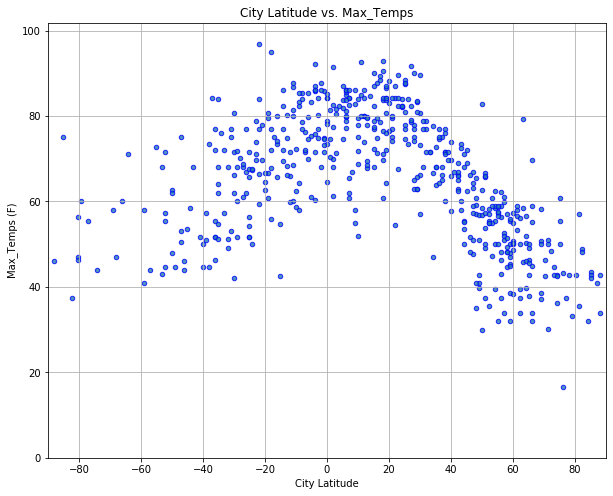

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a series for the needed columns from dataframe
ScatPlot_MaxTemps = clean_city_data_df['Max_Temp']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_MaxTemps.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Max_Temp": List_a,
           "Latitude": List_b}
LatTemp_ScatPlot_df = pd.DataFrame(Listsab)
LatTemp_ScatPlot_df

# Create plot
LatTemp_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Max_Temp", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Max_Temps")
plt.xlabel("City Latitude")
plt.ylabel("Max_Temps (F)")
plt.xlim(-90, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Temps.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

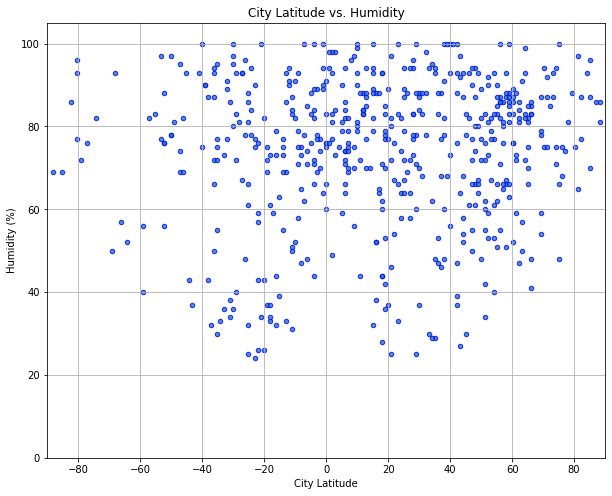

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a series for the needed columns from dataframe
ScatPlot_Hum = clean_city_data_df['Humidity']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Hum.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Humidity": List_a,
           "Latitude": List_b}
LatHum_ScatPlot_df = pd.DataFrame(Listsab)
LatHum_ScatPlot_df

# Create plot
LatHum_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Humidity", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(0, 105)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

In [14]:
# Generate a series for the needed columns from dataframe
ScatPlot_Cloud = clean_city_data_df['Cloudiness']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Cloud.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Cloudiness": List_a,
           "Latitude": List_b}
LatCloud_ScatPlot_df = pd.DataFrame(Listsab)
LatCloud_ScatPlot_df

# Create plot
LatCloud_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Cloudiness", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(0, 105)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness.png"))
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

In [15]:
# Generate a series for the needed columns from dataframe
ScatPlot_Wind_Speed = clean_city_data_df['Wind_Speed']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Wind_Speed.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Wind_Speed": List_a,
           "Latitude": List_b}
LatWind_Speed_ScatPlot_df = pd.DataFrame(Listsab)
LatWind_Speed_ScatPlot_df
LatWind_Speed_ScatPlot_df['Wind_Speed'].max()

# Create plot
LatWind_Speed_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Wind_Speed", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Wind_Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(0,(LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+1.5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Windspeed.png"))
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
NorthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude>=0]
print(f"The count for cities in the Northern Hemisphere is: {NorthHem_LatTemp_ScatPlot_df['Latitude'].count()}")

#  CORRELATION COEFFICIENT
MaxTemp = NorthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = NorthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(0, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

The count for cities in the Northern Hemisphere is: 364
The correlation coefficient (r) is -0.8053
The p-value is 3.401340099686781e-84
The r-value is: 0.6485


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
SouthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude<=0]
print(f"The count for cities in the Southern Hemisphere is: {SouthHem_LatTemp_ScatPlot_df['Latitude'].count()}")

#  CORRELATION COEFFICIENT
MaxTemp = SouthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = SouthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],20)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,38), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-90, 0)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

The count for cities in the Southern Hemisphere is: 187
The correlation coefficient (r) is 0.6083
The p-value is 3e-20
The r-value is: 0.37


<Figure size 432x288 with 0 Axes>

### Observations from Max_Temp vs. Latitude (Northern and Southern Hemisphere)
 - There is a strong trend in both the Northern and southern hemisphere data (Stronger with the Northern hemisphere data). R-value of 0.64 for Northern Hemisphere and 0.37 for Southern hemisphere . Temperature drop as you get further away from the equator.
 - Many more data points (cities) in the Northern hemisphere (364 cities) and Southern hemisphere (187 cities). This observation is the true for every plot pair and so will not be repeated each time.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.026
The p-value is 0.620749480360141
The r-value is: 0.0007


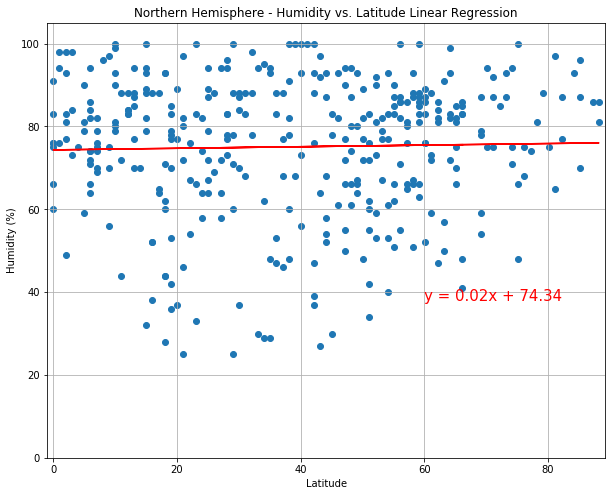

<Figure size 432x288 with 0 Axes>

In [18]:
# dataframe from scatter plot
LatHum_ScatPlot_df
NorthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Humidity = NorthHem_LatHum_ScatPlot_df['Humidity']
Latitude = NorthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],20)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,38), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((NorthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
# dataframe from scatter plot
LatHum_ScatPlot_df
SouthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Humidity = SouthHem_LatHum_ScatPlot_df['Humidity']
Latitude = SouthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((SouthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

The correlation coefficient (r) is -0.031
The p-value is 0.6732100320994775
The r-value is: 0.001


<Figure size 432x288 with 0 Axes>

### Observations from Humidity vs. Latitude (Northern and Southern Hemisphere)
 - There is no discernable trend with the data in the Northern or Southern hemisphere data . R-value of 0.0007 for Northern Hemisphere and 0.001 for Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
NorthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Cloud = NorthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = NorthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((NorthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

The correlation coefficient (r) is 0.1062
The p-value is 0.042889255142691665
The r-value is: 0.0113


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.0011
The p-value is 0.9882748942379793
The r-value is: 0.0


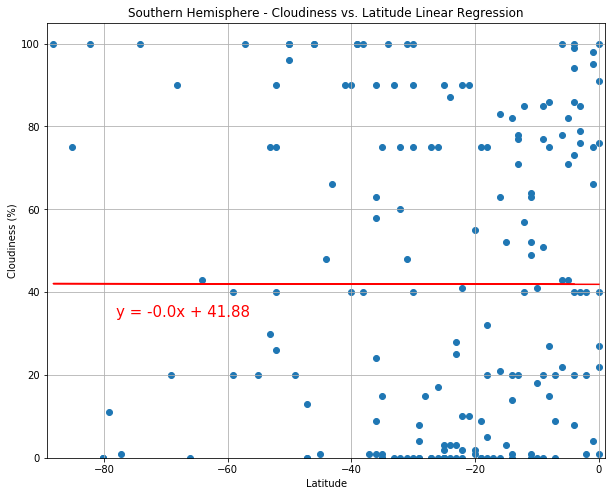

<Figure size 432x288 with 0 Axes>

In [21]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
SouthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Cloud = SouthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = SouthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,34), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((SouthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Cloudiness vs. Latitude (Northern and Southern Hemisphere)
 - There is no discernable trend with the data in the Northern or Southern hemisphere data . R-value of 0.01 for Northern Hemisphere and 0.00 for Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.2254
The p-value is 1.41013319174052e-05
The r-value is: 0.0508


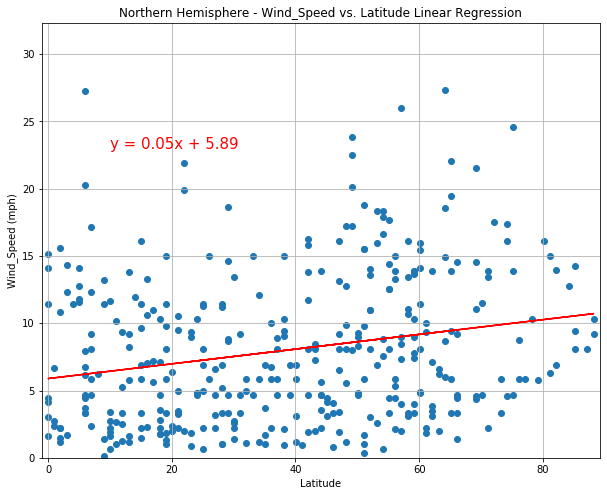

<Figure size 432x288 with 0 Axes>

In [28]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
NorthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Wind = NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = NorthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (10,23), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.2231
The p-value is 0.0021488068436206764
The r-value is: 0.0498


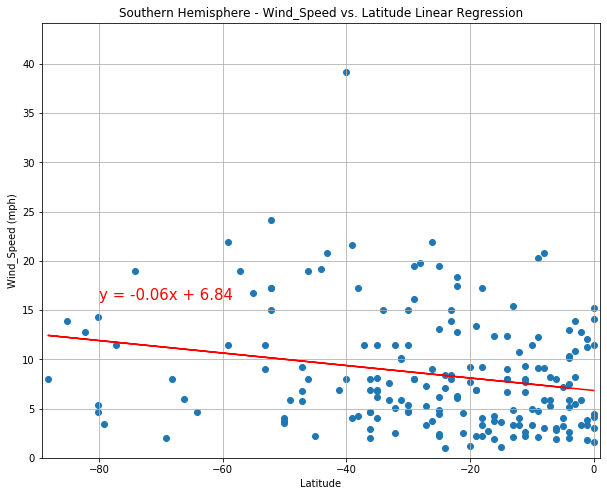

<Figure size 432x288 with 0 Axes>

In [26]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
SouthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Wind = SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = SouthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,16), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Wind_Speed vs. Latitude (Northern and Southern Hemisphere)
 - There is a somewhat weak trend in both the Northern and southern hemisphere data. R-value of 0.05 for Northern Hemisphere and 0.049 for Southern hemisphere . Wind speed drops as you get closer to the equator.

####  Saving csv file

In [24]:
clean_city_data_df.to_csv('clean_city_data.csv', index = False) 
summary_stats_df.to_csv('summary_stats.csv', index = False) 
clean_city_data_df.to_csv('../output_data/clean_city_data.csv', index = False) 
summary_stats_df.to_csv('../output_data/summary_stats.csv', index = False) 
